# Developer Salary Predictive Model
  In this project I use data from the [2023 Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey) to create a predictive model for salaries of developers around the world.

Stack Overflow is a question-and-answer website for programmers.It was created in 2008 by Jeff Atwood and Joel Spolsky. It features questions and answers on computer programming topics.

Since 2011 Stack Overflow has been conducting its annaul develeper survey. Its objectives to gain insights into various aspects of the developer community, including demographics, technology preferences, work habits and career aspirations.  As one of the highest viewed websites in the world, Stack Overflow is well positioned to survey the developer community at scale.



# Project Objective
The objective is of this project is to use the Stack Overflow Annual developer survey to effectively predict the salaries of full-time professional developers.

To acheive this objective I will use domain knowledge to select key features from the dataset.

# The Data
The survey was fielded from May 8, 2023 to May 19, 2023.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, meta.stackoverflow posts, banner ads, and social media posts.

Using domain knowledge features as being the *most* relevant for the model:



*   MainBranch - *Describes whether the respondent is a professional Developer or not*
*   Employment - *Employment status*
*   EdLevel - *Highest level of education obtained*
*   YearsCodePro - *Years coding professionally*
*   Country - *Country where respondent lives*
*   DevType - *Job Description*
*   ConvertedCompYearly - *Total yearly compensation converted to USD($)*
*   ICorPM - *Are you an individual contributor or people manager?*















# Exploring the Data
I'll first start by importing the libraries we'll use for exploratory data analysis.

In [1]:
# Import pandas, numpy, matplotlib and seaborn for explatory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the csv file as a dataframe using setting ResponseID as the dataframe's index

In [2]:
# Importing CSV file setting ResponseID column as the index

salary = pd.read_csv("survey_results_public.csv", index_col = "ResponseId")
salary.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


#Data Cleaning

Now I will filter the dataframe, applying domain knowledge to select the colunms that we will need moving forward.

### Columns to filter for relevant observations
MainBranch and Employment columns will enable us to filter for developer professionals(MainBranch) that are in full-time employment (Employment).

### Columns that have explanatory power
Using domain knowledge I have identified fetaures that can provide a strong starting basis for a model with predictive power for developer salaries.

In [3]:
# selecting features to clean data and include in model

salary_cols = ['MainBranch', 'ConvertedCompYearly', 'EdLevel', "Country", 'Employment',
                   "DevType", 'ICorPM', 'YearsCodePro' ]

In [4]:
# using the list of features salary_col to filter the dataframe

salary = salary[salary_cols]
salary.head()

,MainBranch,ConvertedCompYearly,EdLevel,Country,Employment,DevType,ICorPM,YearsCodePro
ResponseId,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,285000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time","Senior Executive (C-Suite, VP, etc.)",People manager,9
3,I am a developer by profession,250000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time","Developer, back-end",Individual contributor,23
4,I am a developer by profession,156000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time","Developer, front-end",Individual contributor,7
5,I am a developer by profession,23456.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Philippines,"Employed, full-time;Independent contractor, fr...","Developer, full-stack",Individual contributor,4


Next I'll filter the dataframe so that we are left with observations for  professional developers that are full-time employed.

In [5]:
# using str.contains and Employment column to filter the dataframe for observation that are in full employment

full_time_developer = salary['Employment'].str.contains("Employed, full-time", na = False) & salary["MainBranch"].str.contains("I am a developer by profession", na = False)
salary = salary[full_time_developer]

salary.head()

,MainBranch,ConvertedCompYearly,EdLevel,Country,Employment,DevType,ICorPM,YearsCodePro
ResponseId,,,,,,,,
2,I am a developer by profession,285000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time","Senior Executive (C-Suite, VP, etc.)",People manager,9
3,I am a developer by profession,250000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time","Developer, back-end",Individual contributor,23
4,I am a developer by profession,156000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time","Developer, front-end",Individual contributor,7
5,I am a developer by profession,23456.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Philippines,"Employed, full-time;Independent contractor, fr...","Developer, full-stack",Individual contributor,4
6,I am a developer by profession,96828.0,Some college/university study without earning ...,United Kingdom of Great Britain and Northern I...,"Employed, full-time","Developer, back-end",Individual contributor,21


In [6]:
# Using the info() method to generate summary information on each of the dataframe's columns

salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53029 entries, 2 to 87833
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           53029 non-null  object 
 1   ConvertedCompYearly  39140 non-null  float64
 2   EdLevel              53029 non-null  object 
 3   Country              53029 non-null  object 
 4   Employment           53029 non-null  object 
 5   DevType              52875 non-null  object 
 6   ICorPM               36486 non-null  object 
 7   YearsCodePro         50748 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.6+ MB


Utilising the .info() method shows us that we are left with 53,663 observations from the survey having filtered for full-time developers.

We can also see that we have a significant amount of missing values we will need to handle.

I can also see that YearsCodePro is an object when it should be a float. Lets examaine this by looking at the unique values

In [7]:
# obtaining the unique values of the YearsCodePro column

salary.YearsCodePro.unique()

array(['9', '23', '7', '4', '21', '3', '10', '2', '6', 'Less than 1 year',
       '14', '15', '5', '16', '28', '11', '8', '25', nan, '24', '17',
       '29', '12', '20', '1', '19', '18', '30', '27', '13', '43', '22',
       '26', '38', '33', '44', '40', '35', '34', '32', '42', '31', '47',
       '36', '39', '37', '41', 'More than 50 years', '48', '45', '50',
       '46', '49'], dtype=object)

We can see that there are two string response types in the YearsCodePro column. We need to clean this column and tranform it so that it can be of the float category type

In [8]:
# Colapsing "more than 50 years" in to 50 and replacing "Less than 1 year" with 0

YearsCodePro_map = {"More than 50 years" : 50, "Less than 1 year" : 0}
salary['YearsCodePro'] = salary['YearsCodePro'].replace(YearsCodePro_map)

# converting YearsCodePro into a float data type

salary['YearsCodePro'] = salary['YearsCodePro'].astype(float)
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53029 entries, 2 to 87833
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           53029 non-null  object 
 1   ConvertedCompYearly  39140 non-null  float64
 2   EdLevel              53029 non-null  object 
 3   Country              53029 non-null  object 
 4   Employment           53029 non-null  object 
 5   DevType              52875 non-null  object 
 6   ICorPM               36486 non-null  object 
 7   YearsCodePro         50748 non-null  float64
dtypes: float64(2), object(6)
memory usage: 3.6+ MB


In [9]:
# Generating descriptive statistics for the numerical coluns of the salary dataframe

salary.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,ConvertedCompYearly,YearsCodePro
count,39140.00,50748.00
mean,97867.76,10.58
std,328234.69,8.58
min,1.00,0.00
25%,44978.00,4.00
50%,74993.50,8.00
75%,123000.00,15.00
max,57513831.00,50.00


Using the .describe method we can see statistics for the numerical data in the dataframe. Instantly I can see that there are very large figures in the ConvertedCompYearly column that could impact the performance of our model. Lets explore this more detail.

In [10]:
# Sorting the dataframe by highest yearly compensation

salary.sort_values(by='ConvertedCompYearly', ascending=False).head()

,MainBranch,ConvertedCompYearly,EdLevel,Country,Employment,DevType,ICorPM,YearsCodePro
ResponseId,,,,,,,,
28122,I am a developer by profession,57513831.0,Primary/elementary school,Thailand,"Employed, full-time",NaN,Individual contributor,7.0
80587,I am a developer by profession,11000000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,"Employed, full-time;Independent contractor, fr...","Senior Executive (C-Suite, VP, etc.)",NaN,3.0
83680,I am a developer by profession,10319366.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",New Zealand,"Employed, full-time",Engineering manager,People manager,40.0
47798,I am a developer by profession,9915585.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Australia,"Employed, full-time;Independent contractor, fr...","Developer, full-stack",NaN,11.0
64973,I am a developer by profession,9070484.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Portugal,"Employed, full-time;Independent contractor, fr...","Developer, front-end",Individual contributor,12.0


We can see that there are some very high compensation levels at the top end of the scale. The primary purpose of the model is to predict the salary for the typical professional developer. Inclusion of outliers in a machine learning model is likely to negatively impact the performance of the model. So, I'll remove the outliers from the dataset.

In [11]:
# Calculating the interquartile range

seventy_fifth = salary['ConvertedCompYearly'].quantile(0.75)
twenty_fith = salary['ConvertedCompYearly'].quantile(0.25)
IQR = seventy_fifth - twenty_fith

In [12]:
# Creating masks to filter the dataframe for outliers

inliers = (salary['ConvertedCompYearly'] > (twenty_fith - (1.5*IQR))) & (salary['ConvertedCompYearly'] < (seventy_fifth + (1.5*IQR)))
outliers = (salary['ConvertedCompYearly'] < (twenty_fith - (1.5*IQR))) | (salary['ConvertedCompYearly'] > (seventy_fifth + (1.5*IQR)))

salary_inliers = salary[inliers]
salary_inliers.describe()

,ConvertedCompYearly,YearsCodePro
count,37461.000000,37341.000000
mean,82498.794079,10.165984
std,53667.512083,8.213972
min,1.000000,0.000000
25%,43067.000000,4.000000
50%,73045.000000,8.000000
75%,114846.000000,14.000000
max,240000.000000,50.000000


Looking at the ConvertedCompYearly descriptive stats; the standard deviation has reduced significantly as we would expect to happen when outliers are removed from the dataset

In [13]:
# filtering the dataframe for outliers and extracting summary statistics

salary_outliers = salary[outliers]
salary_outliers.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,ConvertedCompYearly,YearsCodePro
count,1679.00,1672.00
mean,440772.33,15.14
std,1525038.26,9.23
min,240271.00,0.00
25%,260000.00,8.00
50%,300000.00,13.00
75%,400000.00,20.00
max,57513831.00,50.00


Looking at the outliiers by country we can see that most observations are from the USA. This is something to bare in mind for future iterations of the model

In [14]:
# sorting the country series by frequency

salary_inliers['Country'].value_counts(ascending=False)

United States of America                                8803
Germany                                                 3064
United Kingdom of Great Britain and Northern Ireland    2901
Canada                                                  1734
India                                                   1648
                                                        ... 
Guyana                                                     1
Guinea-Bissau                                              1
Gabon                                                      1
Fiji                                                       1
Suriname                                                   1
Name: Country, Length: 164, dtype: int64

In [15]:
# Examinig the proportions of Individual contributors/People managers in the outliers

salary_outliers['ICorPM'].value_counts(ascending=False, normalize=True)

Individual contributor    0.816814
People manager            0.183186
Name: ICorPM, dtype: float64

In [16]:
# Examinig the proportions of Individual contributors/People managers in the inliers

salary_inliers['ICorPM'].value_counts(ascending=False, normalize=True)

Individual contributor    0.881067
People manager            0.118933
Name: ICorPM, dtype: float64

In [17]:
# Assinging the inliers to the salary variable

salary = salary_inliers.copy()

To clean the data further I will now condense some of the categorical variables

In [18]:
# Creating a dictionary to condense the DevType feature into a reduces set of categories

DevTypeMap = {
    'Senior Executive (C-Suite, VP, etc.)' : "Senior Executive",
    'Developer, back-end' : "Software Developer",
    'Developer, front-end' : "Software Developer",
    'Developer, full-stack' : "Software Developer",
    'System administrator' : "IT role",
    'Developer, desktop or enterprise applications': "Software Developer",
    'Developer, QA or test' : "Software Developer",
    'Designer': "Other",
    'Data scientist or machine learning specialist': "Data Scientist/Engineer",
    'Data or business analyst': "Data Scientist/Engineer",
    'Security professional' : "IT role",
    'Educator' : "Academia",
    'Research & Development role' : "Academia",
    'Other (please specify):' : 'Other',
    'Developer, embedded applications or devices' : "Software Developer",
    'Student' : "Academia",
    'Engineer, data' : "Data Scientist/Engineer",
    'Developer, game or graphics': "Software Developer",
    'Cloud infrastructure engineer': "IT role",
    'Hardware Engineer' : 'IT role',
    'Product manager': "Non-technical",
    'Engineering manager': "Software Developer",
    'Developer Experience': 'Other',
    'Project manager': "Non-technical",
    'DevOps specialist': "IT role",
    'Engineer, site reliability': "Software Developer",
    'Blockchain': "Software Developer",
    'Scientist': "Academia",
    'Marketing or sales professional': "Non-technical"}

In [19]:
# Condensing categories usingthe replace method and DevTypeMap dictionary

salary['DevType'] = salary['DevType'].replace(DevTypeMap)

In [20]:
# Examining the value counts of the new categories

salary['DevType'].value_counts(dropna=False)

Software Developer         30282
Data Scientist/Engineer     1608
IT role                     1437
Developer, mobile           1391
Other                       1018
Academia                     695
Senior Executive             437
Non-technical                227
Academic researcher          205
Developer Advocate            71
Database administrator        63
NaN                           27
Name: DevType, dtype: int64

In [21]:
# Creating a function colapse_category to colapse categories based on value counts

def colapse_category(categories, cutoff):
  categorical_map = {}
  for i in range(len(categories)):
    if categories.values[i] >= cutoff:
      categorical_map[categories.index[i]] = categories.index[i]
    else:
      categorical_map[categories.index[i]] = 'Other'
  return categorical_map

In [22]:
# Colapse Country category to rename Country as 'Other' if the value count is less than 400

country_map = colapse_category(salary.Country.value_counts(), 400)
salary['Country'] = salary['Country'].map(country_map)
salary.Country.value_counts()

Other                                                   9333
United States of America                                8803
Germany                                                 3064
United Kingdom of Great Britain and Northern Ireland    2901
Canada                                                  1734
India                                                   1648
France                                                  1436
Brazil                                                  1015
Netherlands                                              969
Australia                                                946
Spain                                                    935
Poland                                                   892
Sweden                                                   875
Italy                                                    791
Switzerland                                              460
Denmark                                                  429
Norway                  

In [23]:
# Reducing the strings for USA and UK

USA_UK_map = {"United States of America" : "USA",
              "United Kingdom of Great Britain and Northern Ireland" : "UK & N.I."}
salary['Country'] = salary['Country'].replace(USA_UK_map)
salary.Country.unique()

array(['USA', 'Other', 'UK & N.I.', 'Australia', 'Netherlands', 'Germany',
       'Sweden', 'France', 'Spain', 'Brazil', 'Portugal', 'Canada',
       'Switzerland', 'India', 'Italy', 'Norway', 'Poland', 'Denmark',
       'Israel'], dtype=object)

In [24]:
salary.head()

,MainBranch,ConvertedCompYearly,EdLevel,Country,Employment,DevType,ICorPM,YearsCodePro
ResponseId,,,,,,,,
4,I am a developer by profession,156000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",USA,"Employed, full-time",Software Developer,Individual contributor,7.0
5,I am a developer by profession,23456.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,"Employed, full-time;Independent contractor, fr...",Software Developer,Individual contributor,4.0
6,I am a developer by profession,96828.0,Some college/university study without earning ...,UK & N.I.,"Employed, full-time",Software Developer,Individual contributor,21.0
7,I am a developer by profession,135000.0,Some college/university study without earning ...,USA,"Employed, full-time",Software Developer,Individual contributor,3.0
8,I am a developer by profession,80000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",USA,"Employed, full-time",Software Developer,NaN,3.0


In [25]:
# Function to clean the EdLevel column

def clean_education(x):
  if "Professional degree" in x:
    return "Post grad"
  if "Bachelor’s degree" in x:
    return "Bachelor’s degree"
  if "Master’s degree" in x:
    return "Master’s degree"
  return "Less than a Bachelors'"

In [26]:
# Applying the function to the EdLevel column

salary['EdLevel'] = salary['EdLevel'].apply(clean_education)
salary['EdLevel'].unique()

array(['Bachelor’s degree', "Less than a Bachelors'", 'Master’s degree',
       'Post grad'], dtype=object)

# Exploratory Data Analysis

### Visualising the Data

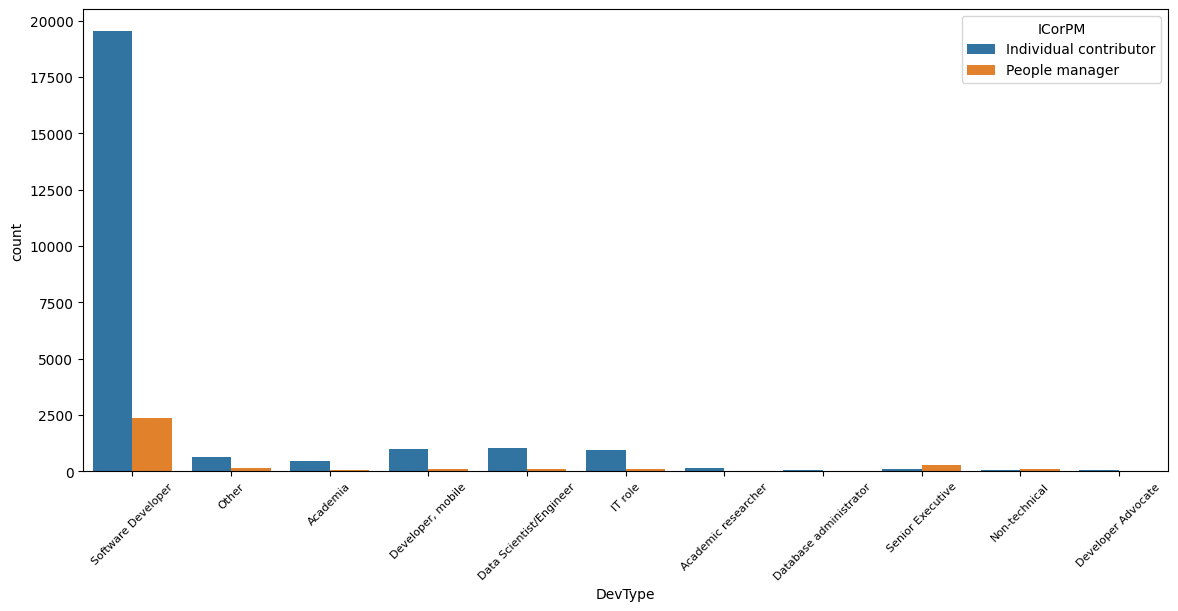

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(x="DevType", data=salary, hue="ICorPM")
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
plt.show()

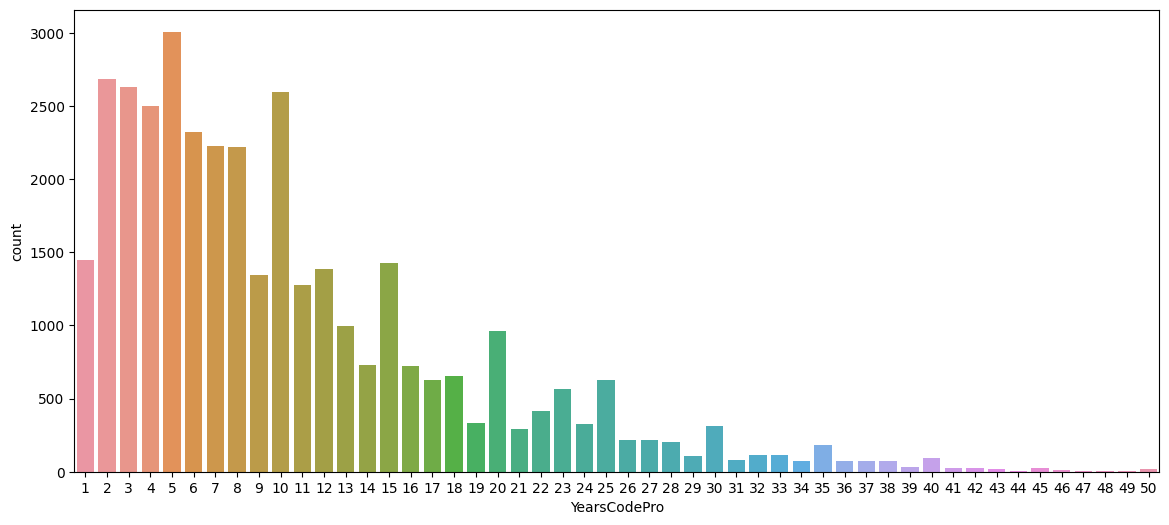

In [28]:
plt.figure(figsize=(14, 6))
sns.countplot(x="YearsCodePro", data=salary, order=range(1,51))
plt.show()

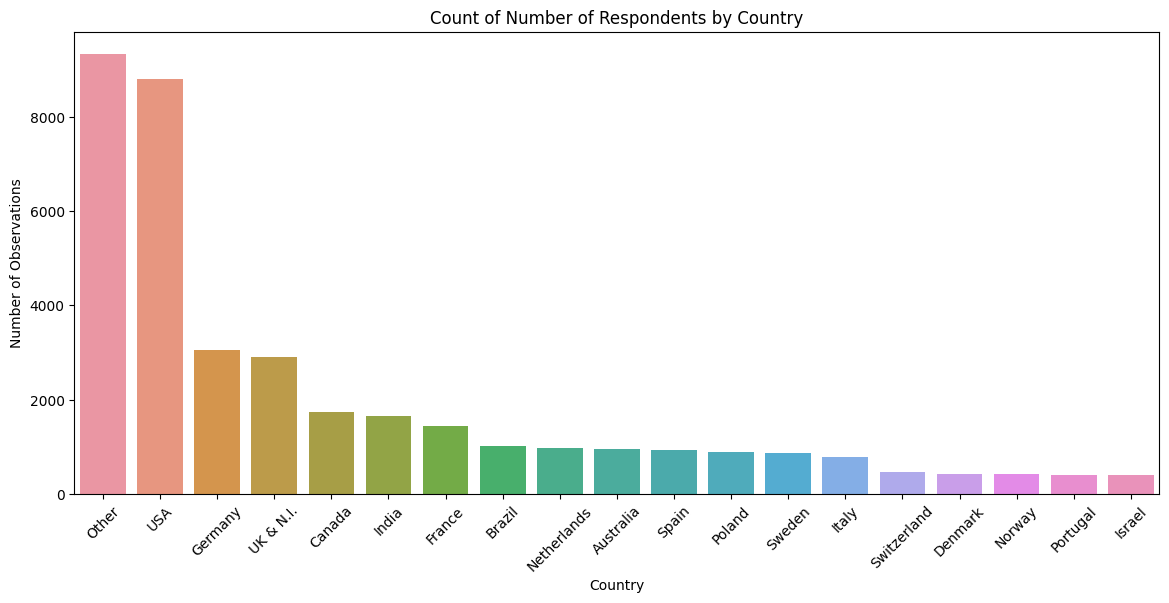

In [29]:
country_order = salary.Country.value_counts(ascending=False).index
plt.figure(figsize=(14, 6))
sns.countplot(x="Country", data=salary, order=country_order)
plt.xlabel("Country")
plt.ylabel("Number of Observations")
plt.title("Count of Number of Respondents by Country")
plt.xticks(rotation=45)
plt.show()

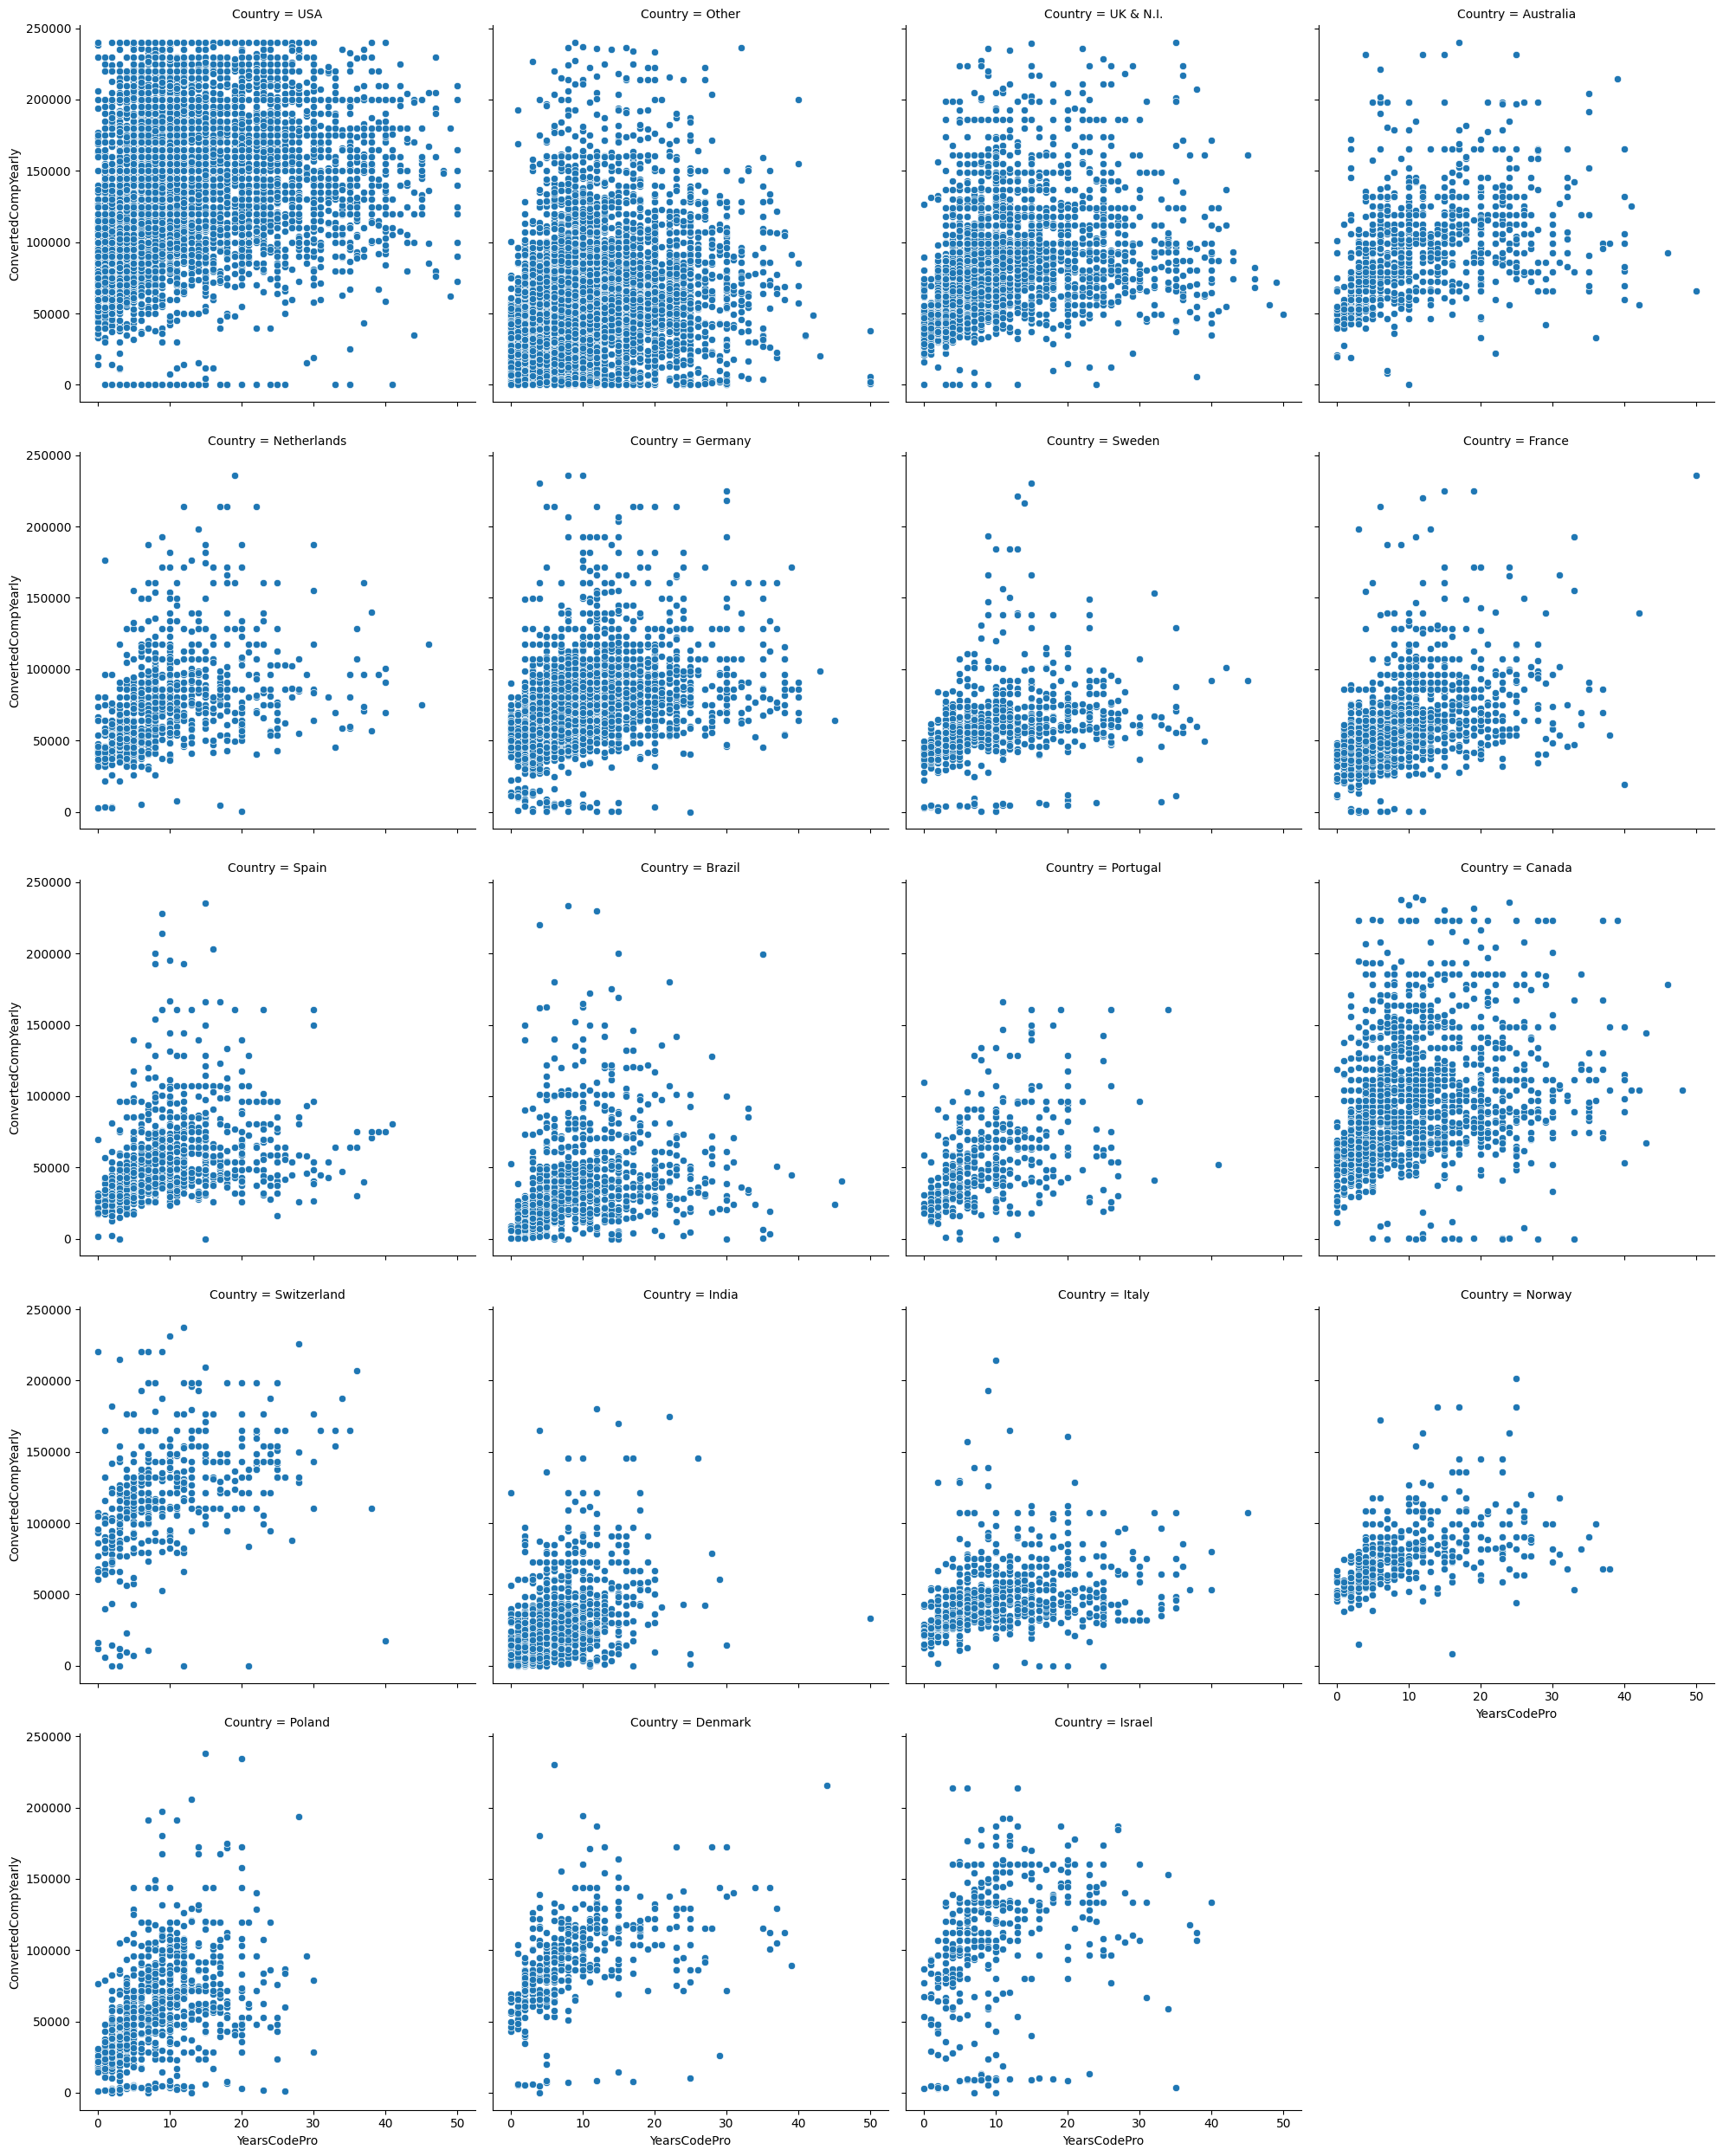

In [30]:
sns.relplot(x="YearsCodePro", y="ConvertedCompYearly", data=salary, kind="scatter", col="Country", col_wrap=4)
plt.show()

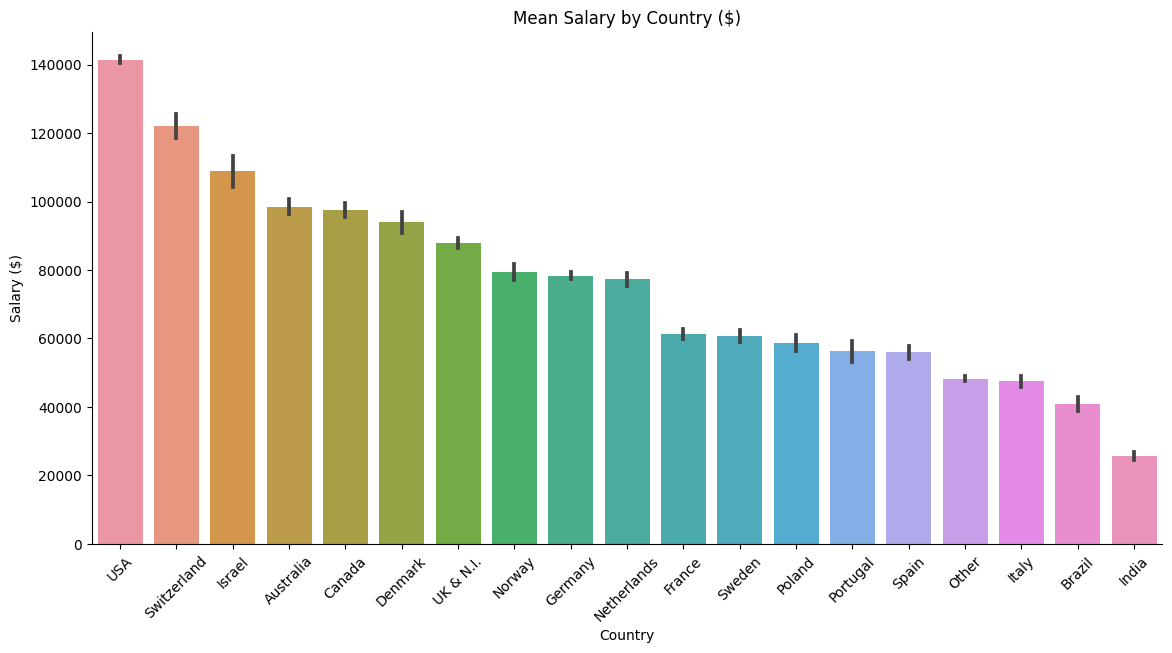

In [31]:
# plotting mean salaries by country

order = salary.groupby("Country")["ConvertedCompYearly"].mean().sort_values(ascending=False).index
g=sns.catplot(x="Country", y="ConvertedCompYearly", kind="bar", order=order, data=salary)
g.fig.set_size_inches(14,6)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Salary ($)")
plt.title("Mean Salary by Country ($)")
plt.show()

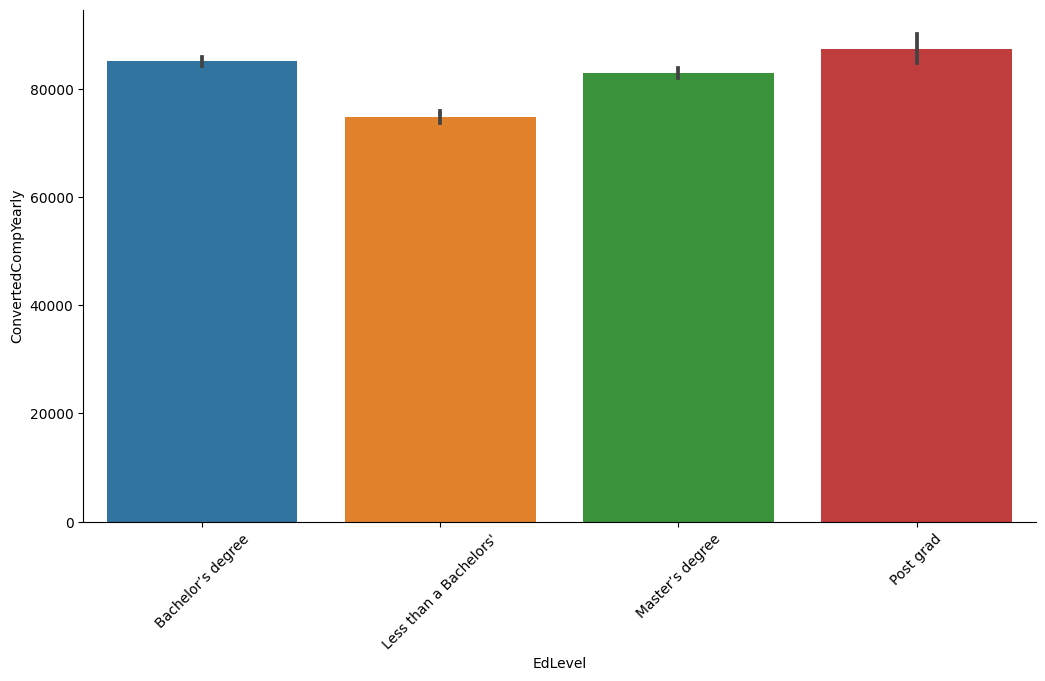

In [32]:
g=sns.catplot(x="EdLevel", y="ConvertedCompYearly", data=salary, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(12,6)
plt.show()

# Creating a Test Set

In [33]:
# Dropping non-explanatory variables from dataframe

salary.drop(columns=["MainBranch", "Employment"], axis=1, inplace=True)
salary.head()

,ConvertedCompYearly,EdLevel,Country,DevType,ICorPM,YearsCodePro
ResponseId,,,,,,
4,156000.0,Bachelor’s degree,USA,Software Developer,Individual contributor,7.0
5,23456.0,Bachelor’s degree,Other,Software Developer,Individual contributor,4.0
6,96828.0,Less than a Bachelors',UK & N.I.,Software Developer,Individual contributor,21.0
7,135000.0,Less than a Bachelors',USA,Software Developer,Individual contributor,3.0
8,80000.0,Bachelor’s degree,USA,Software Developer,NaN,3.0


In [34]:
# splitting the data into test and training data

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(salary, test_size=0.2, random_state=42)

# Create independant and dependant variables

salary = train_set.drop("ConvertedCompYearly", axis = 1)
salary_labels = train_set["ConvertedCompYearly"].copy()

# Preparing the Data

The data null values, categorical variables and columns on different scales that need to be transformed in preparation for the machine learning models.


*   For numerical null-values I will be imputing the median values
*   For categorical null-values I will be imputing the modal values
*   I will transforming categorical variables using one-hot encoding in order to create dummy variables
*   I'll also be standardising numerical independent variables

Lets start by importing all the important modules for a task such as this

In [35]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [36]:
from math import remainder
# categorical pipeline to impute the median and create dummies
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"), OneHotEncoder(handle_unknown="ignore"))

# numerical variable pipeline to impute the median and scale
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
preprocessing=ColumnTransformer([
    ("num", default_num_pipeline, ['YearsCodePro']),
    ("cat", cat_pipeline, ['DevType', 'EdLevel', 'ICorPM', 'Country']),
], remainder = default_num_pipeline )

# Selecting and Training the Model


In [37]:
# Instantiating a linear regression model
lin_reg = make_pipeline(preprocessing, LinearRegression())

# Training the model
lin_reg.fit(salary, salary_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['YearsCodePro']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['DevType', 'EdLevel',
                                                   'ICorPM', 'Country'])])),
                ('linearregression', LinearRegression())])

In [38]:
# Generating predictions

salary_predictions = lin_reg.predict(salary)

In [39]:
# Assessing model performance
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(salary_labels, salary_predictions, squared= False)
lin_rmse

35394.50109327118

In [40]:
# Instantiating a Decision Tree model

from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# Training the model
tree_reg.fit(salary, salary_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['YearsCodePro']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['DevType', 'EdLevel',
                                                   'ICorPM', 'Country'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [41]:
# Generating predictions
salary_tree_predictions = tree_reg.predict(salary)

# Assessing model performance

tree_rmse = mean_squared_error(salary_labels, salary_tree_predictions, squared=False)
tree_rmse

29710.274036387684

In [42]:
# Instantiating a Random Forest model

from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

# Training the model

forest_reg.fit(salary, salary_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['YearsCodePro']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['DevType', 'EdLevel',
                                                   'ICorPM', 'Country'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [43]:
# Generating predictions

forest_predictions = forest_reg.predict(salary)

# Assessing model performance

forest_rmse = mean_squared_error(salary_labels, forest_predictions, squared=False)
forest_rmse

30119.11334035422

In [44]:
# Running cross-validation on each model

from sklearn.model_selection import cross_val_score

# Cross-validation on the linear regression model
lin_reg_rmses = -cross_val_score(lin_reg, salary, salary_labels, scoring = "neg_root_mean_squared_error", cv=10)
pd.Series(lin_reg_rmses).describe()

count       10.000000
mean     35430.611883
std        805.261081
min      33959.324227
25%      35068.468101
50%      35269.935911
75%      35982.582546
max      36765.665515
dtype: float64

In [45]:
# Cross-validation on the decision tree model

tree_reg_rmses = -cross_val_score(tree_reg, salary, salary_labels, scoring = "neg_root_mean_squared_error", cv=10)
pd.Series(tree_reg_rmses).describe()

count       10.000000
mean     37559.771542
std        565.175595
min      36395.040101
25%      37303.626359
50%      37560.790043
75%      37942.840166
max      38361.852324
dtype: float64

In [46]:
forest_reg_rmses = -cross_val_score(forest_reg, salary, salary_labels, scoring = "neg_root_mean_squared_error", cv=10)
pd.Series(forest_reg_rmses).describe()

count       10.000000
mean     35686.564599
std        640.542798
min      34263.063339
25%      35385.401810
50%      35971.407007
75%      36031.810304
max      36552.202007
dtype: float64

# Evaluating the Model on the Test Set

In [47]:
# creatig features and labels from test splits

X_test = test_set.drop('ConvertedCompYearly', axis=1)
y_test = test_set['ConvertedCompYearly'].copy()

In [48]:
# generating final predictions

final_predictions = lin_reg.predict(X_test)


In [49]:
# Calculating the error on test data

final_predictions_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_predictions_rmse)

34673.50875541416


In [50]:
sample_data = pd.DataFrame({
    'YearsCodePro': [5],  # Sample numerical input
    'DevType': ['Software Developer'],  # Sample categorical input
    'EdLevel': ['Bachelor’s degree'],  # Sample categorical input
    'ICorPM': ['Individual contributor'],  # Sample categorical input
    'Country': ['USA'],  # Sample categorical input
})

In [51]:
sample_pred = lin_reg.predict(sample_data)

sample_pred

array([129938.39031431])

In [59]:
model_deploy = lin_reg.fit(salary, salary_labels)

In [60]:
import pickle

with open('model.pkl', 'wb') as file:
  pickle.dump(model_deploy, file = file)

In [61]:
with open('model.pkl', 'rb') as file:
  model_deploy2 = pickle.load(file)

In [62]:
pred_pickle = model_deploy2.predict(sample_data)

In [63]:
pred_pickle

array([129938.39031431])